### Imports

In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

### Import Stanford HCMST Dataset

Link to download file: https://data.stanford.edu/hcmst#download-data

In [27]:
df = pd.read_csv('/Users/jevan/Documents/Python/Datasets/Usable Stanford Relationships/HCMST_ver_3.04.csv', low_memory=False, index_col = 0)
display(df)

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,w3_mbtiming_year,w3_mbtiming_month,w3_q5,w3_q6,w3_q7,w3_q8,w3_q9,w3_q10,w3_nonmbtiming_year,w3_nonmbtiming_month
0,22526,4265,4265.0,52,45-54,45-59,bachelors degree,bachelor's degree or higher,hispanic,female,...,NaN,NaN,yes,yes,"no, did not marry [xNameP]","No, we have not gotten a domestic partnership ...",NaN,NaN,NaN,NaN
1,23286,16485,16485.0,28,25-34,18-29,masters degree,bachelor's degree or higher,"white, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25495,52464,NaN,49,45-54,45-59,high school graduate - high school diploma or ...,high school,"black, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26315,4575,4575.0,31,25-34,30-44,associate degree,some college,"white, non-hispanic",male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27355,12147,NaN,35,35-44,30-44,high school graduate - high school diploma or ...,high school,"white, non-hispanic",male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,4623505,50561,NaN,50,45-54,45-59,masters degree,bachelor's degree or higher,hispanic,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,4625902,23386,NaN,90,75+,60+,7th or 8th grade,less than high school,"white, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3999,4626536,2121,2121.0,53,45-54,45-59,associate degree,some college,"white, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000,4627251,41771,41771.0,25,25-34,18-29,associate degree,some college,"white, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Show as many rows as possible

In [28]:
pd.set_option('display.max_rows', 500)

### Show who's married and who isn't

In [29]:
print(df.married.value_counts())

not married    2071
married        1931
Name: married, dtype: int64


### Make one Married and one Unmarried Dataset

In [30]:
df_unmarried = df.loc[df['married'] == 'not married']
display(df_unmarried.head())
print(len(df_unmarried))

df_married = df.loc[df['married'] == 'married']
display(df_married.head())
print(len(df_married))

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,w3_mbtiming_year,w3_mbtiming_month,w3_q5,w3_q6,w3_q7,w3_q8,w3_q9,w3_q10,w3_nonmbtiming_year,w3_nonmbtiming_month
0,22526,4265,4265.0,52,45-54,45-59,bachelors degree,bachelor's degree or higher,hispanic,female,...,NaN,NaN,yes,yes,"no, did not marry [xNameP]","No, we have not gotten a domestic partnership ...",NaN,NaN,NaN,NaN
2,25495,52464,NaN,49,45-54,45-59,high school graduate - high school diploma or ...,high school,"black, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26315,4575,4575.0,31,25-34,30-44,associate degree,some college,"white, non-hispanic",male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27355,12147,NaN,35,35-44,30-44,high school graduate - high school diploma or ...,high school,"white, non-hispanic",male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,27695,1799,NaN,69,65-74,60+,"some college, no degree",some college,"white, non-hispanic",male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2071


,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,w3_mbtiming_year,w3_mbtiming_month,w3_q5,w3_q6,w3_q7,w3_q8,w3_q9,w3_q10,w3_nonmbtiming_year,w3_nonmbtiming_month
1,23286,16485,16485.0,28,25-34,18-29,masters degree,bachelor's degree or higher,"white, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,29584,3173,3173.0,58,55-64,45-59,masters degree,bachelor's degree or higher,"white, non-hispanic",male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,34341,4924,4924.0,34,25-34,30-44,bachelors degree,bachelor's degree or higher,"white, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,43381,4324,4324.0,38,35-44,30-44,masters degree,bachelor's degree or higher,"white, non-hispanic",male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,44486,3581,3581.0,48,45-54,45-59,"some college, no degree",some college,"black, non-hispanic",female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1931


### Show the modes for each variable in the unmarried dataset
*So I can get a better understanding of the data

In [31]:
df_unmarried.mode().head(1)

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,w3_mbtiming_year,w3_mbtiming_month,w3_q5,w3_q6,w3_q7,w3_q8,w3_q9,w3_q10,w3_nonmbtiming_year,w3_nonmbtiming_month
0,22526,11400.0,264379.0,20.0,45-54,45-59,"some college, no degree",bachelor's degree or higher,"white, non-hispanic",female,...,2010.0,December,yes,yes,"no, did not marry [xNameP]","No, we have not gotten a domestic partnership ...",We broke up,I wanted to break up more,2010.0,April


### Show a list of the unmarried modes

In [32]:
mode_df_unmarried = pd.DataFrame({'Columns': df_unmarried.columns, 'Modes': [df_unmarried[t].mode() for t in df_unmarried],
                   'Val':[df_unmarried[x].isin(df_unmarried[x].mode()).sum() for x in df_unmarried]})


mode_df_unmarried.sort_values('Val',ascending = 'False')

,Columns,Modes,Val
127,q17a,"Series([], dtype: object)",0
64,pphhcomp11_member15_age,"Series([], dtype: float64)",0
242,marrycountry,"Series([], dtype: object)",0
241,marrynotreally,"Series([], dtype: object)",0
318,w2_q1,"Series([], dtype: object)",0
319,w2_q2,"Series([], dtype: object)",0
320,w2_q3,"Series([], dtype: object)",0
321,w2_q4,"Series([], dtype: object)",0
137,q18c_codes,"Series([], dtype: object)",0
147,q21d_refusal,"Series([], dtype: object)",0


### Show a list of the married modes

In [33]:
mode_df_married = pd.DataFrame({'Columns': df_married.columns, 'Modes': [df_married[t].mode() for t in df_married],
                   'Val':[df_married[x].isin(df_married[x].mode()).sum() for x in df_married]})


mode_df_married.sort_values('Val',ascending = 'False')

,Columns,Modes,Val
386,w3_nonmbtiming_month,"Series([], dtype: object)",0
62,pphhcomp11_member13_age,"Series([], dtype: float64)",0
63,pphhcomp11_member14_age,"Series([], dtype: float64)",0
64,pphhcomp11_member15_age,"Series([], dtype: float64)",0
379,w3_q5,"Series([], dtype: object)",0
380,w3_q6,"Series([], dtype: object)",0
381,w3_q7,"Series([], dtype: object)",0
382,w3_q8,"Series([], dtype: object)",0
383,w3_q9,"Series([], dtype: object)",0
76,pphhcomp11_member13_gender,"Series([], dtype: object)",0


### Show a list of the modes in the entire dataset

In [34]:
mode_df = pd.DataFrame({'Columns': df.columns, 'Modes': [df[t].mode() for t in df],
                   'Val':[df[x].isin(df[x].mode()).sum() for x in df]})

mode_df

,Columns,Modes,Val
0,caseid_new,0 22526 1 23286 2 2549...,4002
1,weight1,0 264379 dtype: int64,31
2,weight2,0 264379.0 dtype: float64,25
3,ppage,0 56 dtype: int64,107
4,ppagecat,0 45-54 dtype: object,810
5,ppagect4,0 45-59 dtype: object,1246
6,ppeduc,0 high school graduate - high school diplom...,987
7,ppeducat,0 bachelor's degree or higher dtype: object,1407
8,ppethm,"0 white, non-hispanic dtype: object",3007
9,ppgender,0 female dtype: object,2035


#### Sort the modes

In [35]:
mode_df.sort_values('Val',ascending = 'True')

,Columns,Modes,Val
64,pphhcomp11_member15_age,"Series([], dtype: float64)",0
76,pphhcomp11_member13_gender,0 male dtype: object,1
90,pphhcomp11_member13_relationship,"0 child (biological, adopted, or stepchild)...",1
91,pphhcomp11_member14_relationship,"0 child (biological, adopted, or stepchild)...",1
92,pphhcomp11_member15_relationship,0 please select dtype: object,1
77,pphhcomp11_member14_gender,0 female dtype: object,1
63,pphhcomp11_member14_age,0 2.0 dtype: float64,1
78,pphhcomp11_member15_gender,0 please select dtype: object,1
62,pphhcomp11_member13_age,0 5.0 dtype: float64,1
61,pphhcomp11_member12_age,0 0.0 1 6.0 dtype: float64,2


### Show which values have a bunch of NaNs (null values)
*So I can get an idea of what I should delete. This data has a ton of columns (387), so I need to clean it a bit.

In [36]:
pd.set_option('display.max_rows', 500)
a = df.isnull().sum()/len(df)*100
display(a.sort_values(ascending=True))

caseid_new                            0.000000
pprace_asianindian                    0.000000
pprace_chinese                        0.000000
pprace_filipino                       0.000000
pprace_japanese                       0.000000
pprace_korean                         0.000000
pprace_vietnamese                     0.000000
pprace_otherasian                     0.000000
pprace_hawaiian                       0.000000
pprace_guamanian                      0.000000
pprace_samoan                         0.000000
pprace_otherpacificislander           0.000000
pprace_someotherrace                  0.000000
pppartyid3                            0.000000
pprace_nativeamerican                 0.000000
ppppcmdate_yrmo                       0.000000
w3_xqualified                         0.000000
w3_xpartnered                         0.000000
pp3_newer                             0.000000
pp2_afterp1                           0.000000
irb_consent                           0.000000
weight4      

### If the total amount of null values in a column is higher than 1%, delete that column.
*And then print all the variables that are left.

In [37]:
variables = df.columns
variable = [ ]
for i in range(0,len(df.columns)):
    if a[i]<=1:   #setting the threshold as 30%
        variable.append(variables[i])
        
print(variable)
print(len(variable))

['caseid_new', 'weight1', 'ppage', 'ppagecat', 'ppagect4', 'ppeduc', 'ppeducat', 'ppethm', 'ppgender', 'pphhhead', 'pphouseholdsize', 'pphouse', 'ppincimp', 'hhinc', 'ppmarit', 'ppmsacat', 'ppreg4', 'ppreg9', 'pprent', 'ppt01', 'ppt1317', 'ppt18ov', 'ppt25', 'ppt612', 'children_in_hh', 'ppwork', 'ppnet', 'ppq14arace', 'pphispan', 'pprace_white', 'pprace_black', 'pprace_nativeamerican', 'pprace_asianindian', 'pprace_chinese', 'pprace_filipino', 'pprace_japanese', 'pprace_korean', 'pprace_vietnamese', 'pprace_otherasian', 'pprace_hawaiian', 'pprace_guamanian', 'pprace_samoan', 'pprace_otherpacificislander', 'pprace_someotherrace', 'papglb_friend', 'pppartyid3', 'papreligion', 'ppppcmdate_yrmo', 'pppadate_yrmo', 'irb_consent', 'weight4', 'HCMST_main_interview_yrmo', 'duration', 'qflag', 'glbstatus', 'papglb_status', 'recsource', 's1', 'respondent_race', 'respondent_religion_at_16', 'respondent_relig_16_cat', 'married', 'respondent_yrsed', 'pp2_afterp1', 'pp_igdr1', 'pp_ieduc1', 'pp2_igdr2

In [38]:
df = df[variable]

display(df)
print(len(df.columns))

,caseid_new,weight1,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,...,married,respondent_yrsed,pp2_afterp1,pp_igdr1,pp_ieduc1,pp2_igdr2,pp2_ieduc2,pp3_newer,w3_xpartnered,w3_xqualified
0,22526,4265,52,45-54,45-59,bachelors degree,bachelor's degree or higher,hispanic,female,yes,...,not married,16.0,Yes second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"Yes, pp3 data is newer and available",Qualified for follow-up at wave3,qualified for wave 3
1,23286,16485,28,25-34,18-29,masters degree,bachelor's degree or higher,"white, non-hispanic",female,yes,...,married,17.0,Yes second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"Yes, pp3 data is newer and available",Qualified for follow-up at wave3,qualified for wave 3
2,25495,52464,49,45-54,45-59,high school graduate - high school diploma or ...,high school,"black, non-hispanic",female,yes,...,not married,12.0,Yes second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"Yes, pp3 data is newer and available",unqualified bc unpartnered at main survery,unqualified for wave 3
3,26315,4575,31,25-34,30-44,associate degree,some college,"white, non-hispanic",male,yes,...,not married,14.0,Yes second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"Yes, pp3 data is newer and available",unqualified bc broke up at wave 2,unqualified for wave 3
4,27355,12147,35,35-44,30-44,high school graduate - high school diploma or ...,high school,"white, non-hispanic",male,yes,...,not married,12.0,Yes second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"Yes, pp3 data is newer and available",unqualified bc unpartnered at main survery,unqualified for wave 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,4623505,50561,50,45-54,45-59,masters degree,bachelor's degree or higher,hispanic,female,yes,...,not married,17.0,Yes second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"Yes, pp3 data is newer and available",unqualified bc unpartnered at main survery,unqualified for wave 3
3998,4625902,23386,90,75+,60+,7th or 8th grade,less than high school,"white, non-hispanic",female,no,...,not married,7.5,Yes second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"Yes, pp3 data is newer and available",unqualified bc unpartnered at main survery,unqualified for wave 3
3999,4626536,2121,53,45-54,45-59,associate degree,some college,"white, non-hispanic",female,no,...,not married,14.0,No second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"no, newer pp3 data is Not available",Qualified for follow-up at wave3,qualified for wave 3
4000,4627251,41771,25,25-34,18-29,associate degree,some college,"white, non-hispanic",female,yes,...,married,14.0,No second background survey,value not imputed,value not imputed,value not imputed,value not imputed,"no, newer pp3 data is Not available",Qualified for follow-up at wave3,qualified for wave 3


71


### Remove variables that I know are useless for a Tableau dashboard.
*This is obviously a bit subjective, but I have an idea of what I want to create, and I don't want to have to deal with variables I know I won't use.

In [39]:
#Anything that has pp2 is about the person's partner. I only want data about the survey respondents.
df = df[df.columns.drop(list(df.filter(regex='pp2')))]

#Anything with w3 in it is from the 3rd wave of the study. I don't care about the third wave.
df = df[df.columns.drop(list(df.filter(regex='w3')))]

#Anything with pp_ig is a flag that was used to denote the time when the survey was taken.
df = df[df.columns.drop(list(df.filter(regex='pp_ig')))]

#Another flag
df = df[df.columns.drop(list(df.filter(regex='pp_ie')))]

#Data about the interview portion of the study (mostly just time spent conducting the interviews)
df = df[df.columns.drop(list(df.filter(regex='HCMST_main')))]

#How did they recruit a respondent?
df = df[df.columns.drop(list(df.filter(regex='recsource')))]

#Their weight metric. Useless to me.
df = df[df.columns.drop(list(df.filter(regex='weight')))]

#does the respondent have a spouse or partner?
df = df[df.columns.drop(list(df.filter(regex='qflag')))]

#It's LGBT status, but there's already another one in the dataset. It's papglb_status. I'll choose that one. 
df = df[df.columns.drop(list(df.filter(regex='glbstatus')))]

#Did they consent to taking the survey? Of course they did...
df = df[df.columns.drop(list(df.filter(regex='irb_consent')))]

#Duration of the interview. Maybe I could use this one because if they took a long time with the interview, 
#that could mean that they are good at holding a conversation and- nah. Drop it.
df = df[df.columns.drop(list(df.filter(regex='duration')))]

#Including you, how many people live in your household. Could be useful. But could also be a bit deceptive.
# "I have 3 people living in my house."
# "Oh, you, your wife, and your kid?"
# "Nah, me, my mama, and my girlfriend..."
# See?
# I do understand why it could be useful though. I just won't use it.
df = df[df.columns.drop(list(df.filter(regex='pphouseholdsize')))]

In [40]:
len(df.columns)

55

In [41]:
df.dtypes

caseid_new                       int64
ppage                            int64
ppagecat                        object
ppagect4                        object
ppeduc                          object
ppeducat                        object
ppethm                          object
ppgender                        object
pphhhead                        object
pphouse                         object
ppincimp                        object
hhinc                            int64
ppmarit                         object
ppmsacat                        object
ppreg4                          object
ppreg9                          object
pprent                          object
ppt01                            int64
ppt1317                          int64
ppt18ov                          int64
ppt25                            int64
ppt612                           int64
children_in_hh                   int64
ppwork                          object
ppnet                           object
ppq14arace               

### Save the clean-ish dataset to my computer.

In [ ]:
df.to_csv("output2.csv")

## And we're done with the Tableau stuff.
### However, I also wanted to play around with the data a little bit and see if I could build a reliable model that would predict if someone had the necessary qualities to get married. That work is done below.
*Spoiler: I couldn't. But I think that speaks to how difficult it is to predict if someone is marriage potential or not. You never really know what you're going to get when you try to build a connection with someone, so it's best to just try and see where it takes you.

Does that sound good? I just BS'ed that, but I hope that sounds good. The real reason is because the number of observartions was relatively small (only 4,200 survey respondents), but I think my BS sounds better.

### Make all variables that are type 'object' numerical. 
*I wanted to use get_dummies, but it created a ton of columns. I want to keep the number of columns as low as possible because the models I want to use work better with smaller numbers of variables. So I used LabelEncoder instead. I don't know how wise that was, but I did it anyway.

In [42]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df_factorized = df.copy()
char_cols = df_factorized.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df_factorized[c], label_mapping[c] = pd.factorize(df_factorized[c])
    
display(df_factorized)

,caseid_new,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouse,...,ppppcmdate_yrmo,pppadate_yrmo,papglb_status,s1,respondent_race,respondent_religion_at_16,respondent_relig_16_cat,married,respondent_yrsed,pp3_newer
0,22526,52,0,0,0,0,0,0,0,0,...,200711,200709,0,0,0,0,0,0,16.0,0
1,23286,28,1,1,1,0,1,0,0,0,...,200711,200709,0,1,1,1,1,1,17.0,0
2,25495,49,0,0,2,1,2,0,0,0,...,200711,200709,1,0,2,2,0,0,12.0,0
3,26315,31,1,2,3,2,1,1,0,0,...,200710,200709,0,0,1,3,2,0,14.0,0
4,27355,35,2,2,2,1,1,1,0,1,...,200710,200709,2,0,1,4,0,0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,4623505,50,0,0,1,0,0,0,0,2,...,200711,200709,1,0,0,0,0,0,17.0,0
3998,4625902,90,5,3,7,3,1,0,1,2,...,200801,200802,1,0,1,5,3,0,7.5,0
3999,4626536,53,0,0,3,2,1,0,1,1,...,200711,200711,0,0,1,4,0,0,14.0,1
4000,4627251,25,1,1,3,2,1,0,0,2,...,200808,200808,1,1,1,6,4,1,14.0,1


### Here are all the columns that got factorized and what those factors are.

In [44]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in label_mapping.items() ]))

,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouse,ppincimp,ppmarit,...,papglb_friend,pppartyid3,papreligion,papglb_status,s1,respondent_race,respondent_religion_at_16,respondent_relig_16_cat,married,pp3_newer
0,45-54,45-59,bachelors degree,bachelor's degree or higher,hispanic,female,yes,a building with 2 or more apartments,"$20,000 to $24,999",living with partner,...,"yes, friends",democrat,catholic,yes,"no, i am not married",Hispanic,"protestant (e.g. methodist, lutheran, presbyte...",Protestant or oth Christian,not married,"Yes, pp3 data is newer and available"
1,25-34,18-29,masters degree,high school,"white, non-hispanic",male,no,a one-family house attached to one or more houses,"$40,000 to $49,999",never married,...,"yes, both",republican,jewish,no,"yes, i am married",NH white,jewish,Jewish,married,"no, newer pp3 data is Not available"
2,35-44,30-44,high school graduate - high school diploma or ...,some college,"black, non-hispanic",NaN,NaN,a one-family house detached from any other house,"$35,000 to $39,999",separated,...,"yes, relatives",other,baptist-any denomination,i would prefer to not answer this question,NaN,NH black,baptist - any denomination,Neither Christian nor Jewish,NaN,NaN
3,65-74,60+,associate degree,less than high school,"2+ races, non-hispanic",NaN,NaN,a mobile home,"$25,000 to $29,999",divorced,...,no,NaN,"other non-christian, please specify:",NaN,NaN,NH Amer Indian,"other non-christian, please specify",Catholic,NaN,NaN
4,55-64,NaN,"some college, no degree",NaN,"other, non-hispanic",NaN,NaN,"boat, rv, van, etc.","$125,000 to $149,999",married,...,i would prefer to not answer this question,NaN,other christian,NaN,NaN,NH Asian Pac Islander,other christian,No religion,NaN,NaN
5,75+,NaN,professional or doctorate degree,NaN,NaN,NaN,NaN,NaN,"$15,000 to $19,999",widowed,...,NaN,NaN,"protestant (e.g., methodist, lutheran, presbyt...",NaN,NaN,NH Other,catholic,NaN,NaN,NaN
6,18-24,NaN,11th grade,NaN,NaN,NaN,NaN,NaN,"$75,000 to $84,999",NaN,...,NaN,NaN,none,NaN,NaN,NaN,none,NaN,NaN,NaN
7,NaN,NaN,7th or 8th grade,NaN,NaN,NaN,NaN,NaN,"$175,000 or more",NaN,...,NaN,NaN,pentecostal,NaN,NaN,NaN,pentecostal,NaN,NaN,NaN
8,NaN,NaN,12th grade no diploma,NaN,NaN,NaN,NaN,NaN,"$85,000 to $99,999",NaN,...,NaN,NaN,buddhist,NaN,NaN,NaN,buddhist,NaN,NaN,NaN
9,NaN,NaN,9th grade,NaN,NaN,NaN,NaN,NaN,"$12,500 to $14,999",NaN,...,NaN,NaN,eastern orthodox,NaN,NaN,NaN,eastern orthodox,NaN,NaN,NaN


### Build a correlation matrix to see if there are any columns closely correlated with marriage.

In [45]:
corr_matrix = df_factorized.corr(method='spearman')
display(corr_matrix[['married']].sort_values(by='married',ascending=False))
print(len(corr_matrix))

,married
married,1.000000
s1,1.000000
ppmarit,0.648488
papglb_status,0.248075
ppt18ov,0.237430
children_in_hh,0.224104
hhinc,0.208866
pphouse,0.200508
ppt25,0.190017
ppt612,0.181591


55


### There are. The columns 's1' and 'ppmarit' gotta go.

In [46]:
df_factorized = df_factorized.drop(['s1','ppmarit'],1)
print(len(df_factorized.columns))

53


/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_58722/1322683039.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_factorized = df_factorized.drop(['s1','ppmarit'],1)


### Count the nulls one more time.
*Just to make sure.

In [47]:
count = df_factorized.isnull().sum()

print(count)
print()
print(len(count))

caseid_new                     0
ppage                          0
ppagecat                       0
ppagect4                       0
ppeduc                         0
ppeducat                       0
ppethm                         0
ppgender                       0
pphhhead                       0
pphouse                        0
ppincimp                       0
hhinc                          0
ppmsacat                       0
ppreg4                         0
ppreg9                         0
pprent                         0
ppt01                          0
ppt1317                        0
ppt18ov                        0
ppt25                          0
ppt612                         0
children_in_hh                 0
ppwork                         0
ppnet                          0
ppq14arace                     0
pphispan                       0
pprace_white                   0
pprace_black                   0
pprace_nativeamerican          0
pprace_asianindian             0
pprace_chi

### Set my X and y for my models

In [48]:
X = df_factorized.drop(['married'], 1)
display(X.head())
print(len(X))
print(len(X.columns))


y = df_factorized['married']
display(y.head())
print(len(y))

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_58722/1878765824.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_factorized.drop(['married'], 1)


,caseid_new,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouse,...,pppartyid3,papreligion,ppppcmdate_yrmo,pppadate_yrmo,papglb_status,respondent_race,respondent_religion_at_16,respondent_relig_16_cat,respondent_yrsed,pp3_newer
0,22526,52,0,0,0,0,0,0,0,0,...,0,0,200711,200709,0,0,0,0,16.0,0
1,23286,28,1,1,1,0,1,0,0,0,...,0,1,200711,200709,0,1,1,1,17.0,0
2,25495,49,0,0,2,1,2,0,0,0,...,0,2,200711,200709,1,2,2,0,12.0,0
3,26315,31,1,2,3,2,1,1,0,0,...,0,3,200710,200709,0,1,3,2,14.0,0
4,27355,35,2,2,2,1,1,1,0,1,...,0,4,200710,200709,2,1,4,0,12.0,0


4002
52


0    0
1    1
2    0
3    0
4    0
Name: married, dtype: int64

4002


### Run a Random Forest Regression to see if there are any super important variables.

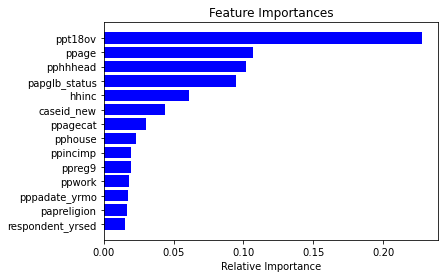

In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
#no_na_dummyfiftypercent_X = dummyfiftypercent_X.fillna(0)
model.fit(X,y)

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-14:]  # top 15 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### There's one. It's 'ppt18ov'. This is how many adults over 18 are in your house. Makes sense.

### I also tried RFE (Recursive Feature Elimination), but my score was pretty low and the amount of features it selected was very high, so I'll leave this one alone. 
*I think this model works best when the number of variables in your dataset is relatively low (under 20), so I believe that my 50 variable dataset may have caused some problems.

In [57]:
#no of features
nof_list=np.arange(1,len(X.columns))            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/util

/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=31 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=32 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=33 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/u

Optimum number of features: 51
Score with 51 features: 0.259325


/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=46 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=47 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=48 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/u

#### *Too many warnings.*

In [81]:
import warnings
warnings.filterwarnings("ignore")

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 51
Score with 51 features: 0.259325


In [59]:
cols = list(X.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 51)     

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y) 

#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['ppage', 'ppagecat', 'ppagect4', 'ppeduc', 'ppeducat', 'ppethm',
       'ppgender', 'pphhhead', 'pphouse', 'ppincimp', 'hhinc', 'ppmsacat',
       'ppreg4', 'ppreg9', 'pprent', 'ppt01', 'ppt1317', 'ppt18ov', 'ppt25',
       'ppt612', 'children_in_hh', 'ppwork', 'ppnet', 'ppq14arace', 'pphispan',
       'pprace_white', 'pprace_black', 'pprace_nativeamerican',
       'pprace_asianindian', 'pprace_chinese', 'pprace_filipino',
       'pprace_japanese', 'pprace_korean', 'pprace_vietnamese',
       'pprace_otherasian', 'pprace_hawaiian', 'pprace_guamanian',
       'pprace_samoan', 'pprace_otherpacificislander', 'pprace_someotherrace',
       'papglb_friend', 'pppartyid3', 'papreligion', 'ppppcmdate_yrmo',
       'pppadate_yrmo', 'papglb_status', 'respondent_race',
       'respondent_religion_at_16', 'respondent_relig_16_cat',
       'respondent_yrsed', 'pp3_newer'],
      dtype='object')


/Users/jevan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=51 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### Since I have a ton of features, I decided to use one of the models that's built for tons of features: Lasso.

In [86]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 94.719083
Best score using built-in LassoCV: 0.027397


Text(0.5, 1.0, 'Feature importance using Lasso Model')

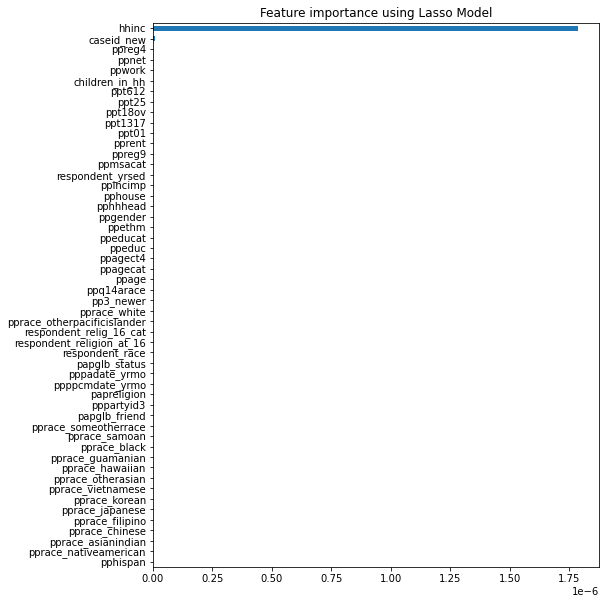

In [80]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### That is a really high alpha and a really, really low score. And it only picked two variables (since the alpha was so high).
*I'm not sure how I got here, but I tried doing some more testing. And the results I got weren't ideal. I believe that I probably need to do some more tuning, but since my main objective (creating a clean dataset for Tableau) has already been accomplished, I will do that some other time.

### More failed testing.

In [77]:
from sklearn.linear_model import Lasso

In [78]:
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    lasso_df = pd.DataFrame()
    
    # Create a column of feature names
    lasso_df['Feature Name'] = X.columns
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        lasso_df[column_name] = lasso.coef_
        
    # Return the dataframe    
    return lasso_df

In [79]:
lasso([.0001, .5, 10])

,Feature Name,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
0,caseid_new,5.220760e-09,1.126079e-08,1.049174e-08
1,ppage,4.880195e-03,1.194876e-03,0.000000e+00
2,ppagecat,-3.998210e-02,-0.000000e+00,-0.000000e+00
3,ppagect4,3.817651e-02,0.000000e+00,0.000000e+00
4,ppeduc,1.200509e-02,0.000000e+00,0.000000e+00
5,ppeducat,-5.479672e-02,0.000000e+00,0.000000e+00
6,ppethm,8.407439e-04,-0.000000e+00,-0.000000e+00
7,ppgender,6.858273e-03,0.000000e+00,0.000000e+00
8,pphhhead,-2.711332e-01,-0.000000e+00,-0.000000e+00
9,pphouse,6.174387e-02,0.000000e+00,0.000000e+00


### I also wanted to test if the results were different for men and women. I also wanted to take the opportunity to create a variable called X_men...

In [53]:
df_men = df_factorized.loc[df_factorized['ppgender'] == 1]
display(df_men.head())
print(len(df_men))


df_women = df_factorized.loc[df_factorized['ppgender'] == 0]
display(df_women.head())
print(len(df_women))

,caseid_new,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouse,...,papreligion,ppppcmdate_yrmo,pppadate_yrmo,papglb_status,respondent_race,respondent_religion_at_16,respondent_relig_16_cat,married,respondent_yrsed,pp3_newer
3,26315,31,1,2,3,2,1,1,0,0,...,3,200710,200709,0,1,3,2,0,14.0,0
4,27355,35,2,2,2,1,1,1,0,1,...,4,200710,200709,2,1,4,0,0,12.0,0
5,27695,69,3,3,4,2,1,1,0,0,...,5,200711,200709,0,1,0,0,0,13.0,0
6,28536,53,0,0,0,0,1,1,0,2,...,5,200710,200709,0,1,0,0,0,16.0,0
7,29584,58,4,0,1,0,1,1,0,0,...,5,200710,200709,0,1,0,0,1,17.0,0


1967


,caseid_new,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouse,...,papreligion,ppppcmdate_yrmo,pppadate_yrmo,papglb_status,respondent_race,respondent_religion_at_16,respondent_relig_16_cat,married,respondent_yrsed,pp3_newer
0,22526,52,0,0,0,0,0,0,0,0,...,0,200711,200709,0,0,0,0,0,16.0,0
1,23286,28,1,1,1,0,1,0,0,0,...,1,200711,200709,0,1,1,1,1,17.0,0
2,25495,49,0,0,2,1,2,0,0,0,...,2,200711,200709,1,2,2,0,0,12.0,0
10,32656,65,3,3,1,0,1,0,0,2,...,6,200710,200711,0,1,5,3,0,17.0,1
12,34341,34,1,2,0,0,1,0,0,2,...,3,200801,200801,0,1,6,4,1,16.0,0


2035


In [54]:
X_men = df_men.drop(['married'], 1)
display(X_men.head())
print(len(X_men))

y_men = df_men['married']
display(y_men.head())
print(len(y_men))

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_58722/342963779.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_men = df_men.drop(['married'], 1)


,caseid_new,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouse,...,pppartyid3,papreligion,ppppcmdate_yrmo,pppadate_yrmo,papglb_status,respondent_race,respondent_religion_at_16,respondent_relig_16_cat,respondent_yrsed,pp3_newer
3,26315,31,1,2,3,2,1,1,0,0,...,0,3,200710,200709,0,1,3,2,14.0,0
4,27355,35,2,2,2,1,1,1,0,1,...,0,4,200710,200709,2,1,4,0,12.0,0
5,27695,69,3,3,4,2,1,1,0,0,...,0,5,200711,200709,0,1,0,0,13.0,0
6,28536,53,0,0,0,0,1,1,0,2,...,0,5,200710,200709,0,1,0,0,16.0,0
7,29584,58,4,0,1,0,1,1,0,0,...,0,5,200710,200709,0,1,0,0,17.0,0


1967


3    0
4    0
5    0
6    0
7    1
Name: married, dtype: int64

1967


In [55]:
X_women = df_women.drop(['married'], 1)
display(X_women.head())
print(len(X_women))

y_women = df_women['married']
display(y_women.head())
print(len(y_women))

/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_58722/3102795099.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_women = df_women.drop(['married'], 1)


,caseid_new,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouse,...,pppartyid3,papreligion,ppppcmdate_yrmo,pppadate_yrmo,papglb_status,respondent_race,respondent_religion_at_16,respondent_relig_16_cat,respondent_yrsed,pp3_newer
0,22526,52,0,0,0,0,0,0,0,0,...,0,0,200711,200709,0,0,0,0,16.0,0
1,23286,28,1,1,1,0,1,0,0,0,...,0,1,200711,200709,0,1,1,1,17.0,0
2,25495,49,0,0,2,1,2,0,0,0,...,0,2,200711,200709,1,2,2,0,12.0,0
10,32656,65,3,3,1,0,1,0,0,2,...,0,6,200710,200711,0,1,5,3,17.0,1
12,34341,34,1,2,0,0,1,0,0,2,...,0,3,200801,200801,0,1,6,4,16.0,0


2035


0     0
1     1
2     0
10    0
12    1
Name: married, dtype: int64

2035


### Random Forest (Men)

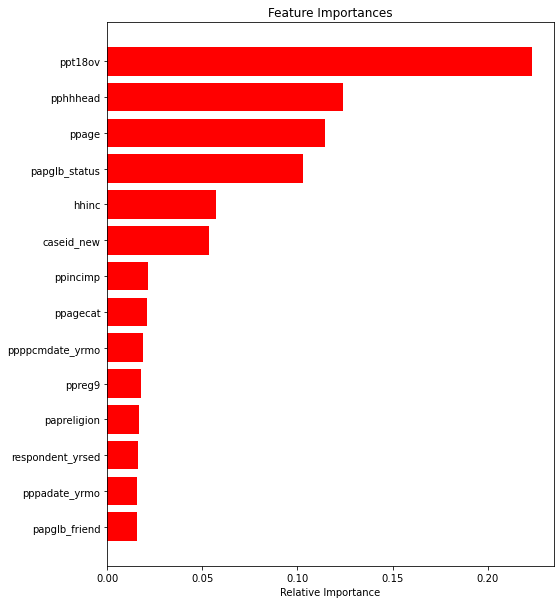

In [82]:
#from sklearn.ensemble import RandomForestRegressor
model_men = RandomForestRegressor(random_state=1, max_depth=10)
#no_na_dummyfiftypercent_X = dummyfiftypercent_X.fillna(0)
model_men.fit(X_men,y_men)

features_men = X_men.columns
importances_men = model_men.feature_importances_
indices_men = np.argsort(importances_men)[-14:]  # top 15 features
plt.title('Feature Importances')
plt.barh(range(len(indices_men)), importances_men[indices_men], color='r', align='center')
plt.yticks(range(len(indices_men)), [features_men[i] for i in indices_men])
plt.xlabel('Relative Importance')
plt.show()

### RFE (Men)

In [83]:
#no of features
nof_list_men = np.arange(1,len(X_men.columns))            
high_score_men = 0

#Variable to store the optimum features
nof_men =0           
score_list_men =[]

for n in range(len(nof_list_men)):
    X_train, X_test, y_train, y_test = train_test_split(X_men,y_men, test_size = 0.3, random_state = 0)
    model_men = LinearRegression()
    rfe = RFE(model_men,nof_list_men[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model_men.fit(X_train_rfe,y_train)
    score_men = model_men.score(X_test_rfe,y_test)
    score_list_men.append(score_men)
    if(score_men>high_score_men):
        high_score_men = score_men
        nof_men = nof_list_men[n]
        
print("Optimum number of features: %d" %nof_men)
print("Score with %d features: %f" % (nof_men, high_score_men))

Optimum number of features: 51
Score with 51 features: 0.257287


#### Almost exactly the same as the previous model.

Text(0.5, 1.0, 'Feature importance using Lasso Model')

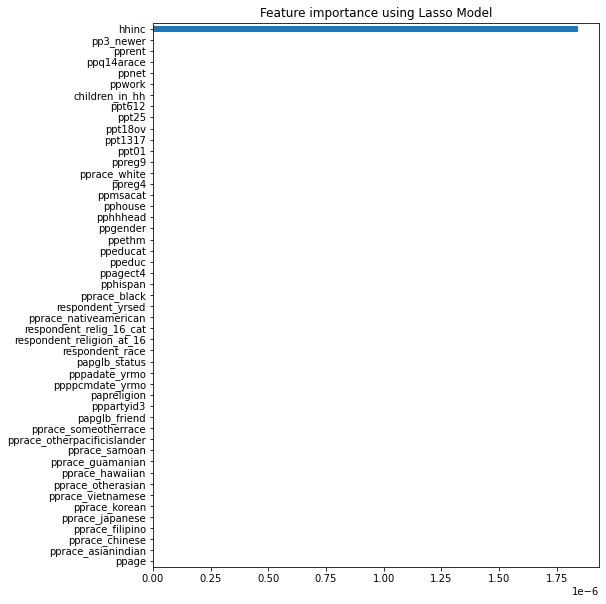

In [212]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Random Forest (Women)

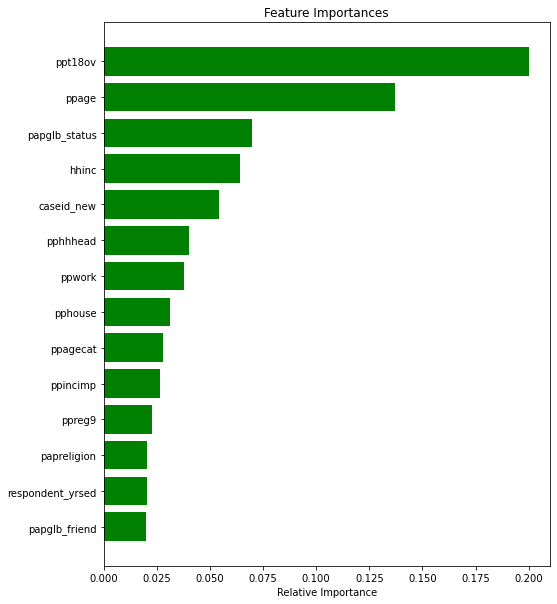

In [84]:
#from sklearn.ensemble import RandomForestRegressor
model_women = RandomForestRegressor(random_state=1, max_depth=10)
#no_na_dummyfiftypercent_X = dummyfiftypercent_X.fillna(0)
model_women.fit(X_women,y_women)

features_women = X_women.columns
importances_women = model_women.feature_importances_
indices_women = np.argsort(importances_women)[-14:]  # top 15 features
plt.title('Feature Importances')
plt.barh(range(len(indices_women)), importances_women[indices_women], color='g', align='center')
plt.yticks(range(len(indices_women)), [features_women[i] for i in indices_women])
plt.xlabel('Relative Importance')
plt.show()

### Lasso (Women)

In [88]:
reg = LassoCV()
reg.fit(X_women, y_women)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_women,y_women))
coef = pd.Series(reg.coef_, index = X_women.columns)

Best alpha using built-in LassoCV: 54.654676
Best score using built-in LassoCV: 0.021714


Alpha's lower, but the score still sucks. I'll stop here.

### Conclusion
In conclusion, I might need to do some tuning on the models, getting married seems pretty difficult, and I DEFINITELY need some more observations, but this is a good start. And I have what I need for Tableau, so it's all good.